# Importing the necessary packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Extracting the data

In [2]:
data = pd.read_csv('E:/Decision_Tree_Project8/iphone_purchase_records.csv')

In [3]:
data.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


# Preprocessing

In [4]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data['Gender'] = label.fit_transform(data['Gender'])

In [5]:
data1 = data.copy()

In [6]:
# Since gender is an object, we have to convert this textual column to numerical column
# using Label encoding

# EDA

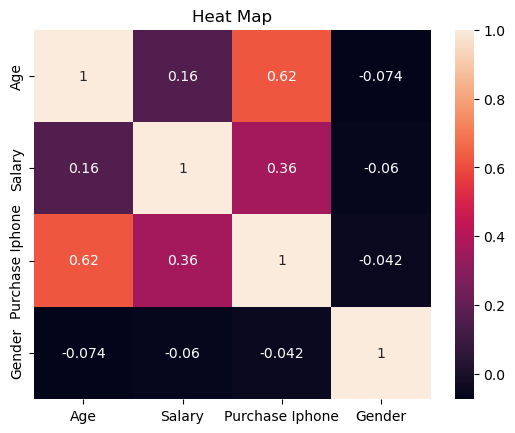

In [7]:
# Correlation heatmap
path = 'E:/Decision_Tree_Project8'
file_path = os.path.join(path, 'Heat_map.png')
cor = data1[['Age', 'Salary', 'Purchase Iphone', 'Gender']].corr()
sns.heatmap(cor, annot=True)
plt.title('Heat Map')
plt.savefig(file_path)
plt.show()

In [8]:
# Heat map shows the correlation between the variables
# Purchased Iphone is more correlated with age, and less correlated with other variables

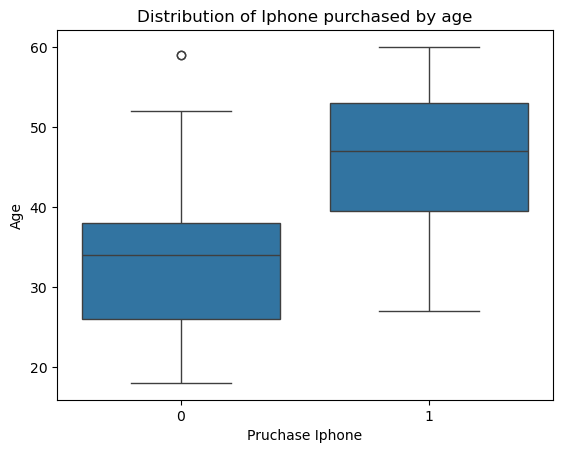

In [8]:
path = 'E:/Decision_Tree_Project8'
file_path = os.path.join(path, 'Box_plot_age_after_Imputation.png')
sns.boxplot(x = 'Purchase Iphone', y = 'Age', data = data1)
plt.xlabel('Pruchase Iphone')
plt.ylabel('Age')
plt.title('Distribution of Iphone purchased by age')
plt.savefig(file_path)
plt.show()

In [9]:
Q1 = data1[(data1['Purchase Iphone'] == 0)]['Age'].quantile(0.25)
print(f'The Q1 value is {Q1}')
Q3 = data1[(data1['Purchase Iphone'] == 0)]['Age'].quantile(0.75)
print(f'The Q3 value is {Q3}')
IQR = Q3 - Q1
print(f'The IQR value is {IQR}')
upper = Q3 + 1.5 * IQR
print(f'The Upper threshold value is {upper}')
lower = Q1 - 1.5 * IQR
print(f'The Lower threshold value is {lower}')

outliers = data1[(data1['Purchase Iphone']==0)& (data1['Age']> upper)]
print(outliers)
data1.loc[outliers.index, 'Purchase Iphone'] = 1

The Q1 value is 26.0
The Q3 value is 38.0
The IQR value is 12.0
The Upper threshold value is 56.0
The Lower threshold value is 8.0
     Gender  Age  Salary  Purchase Iphone
64        0   59   83000                0
212       0   59   42000                0


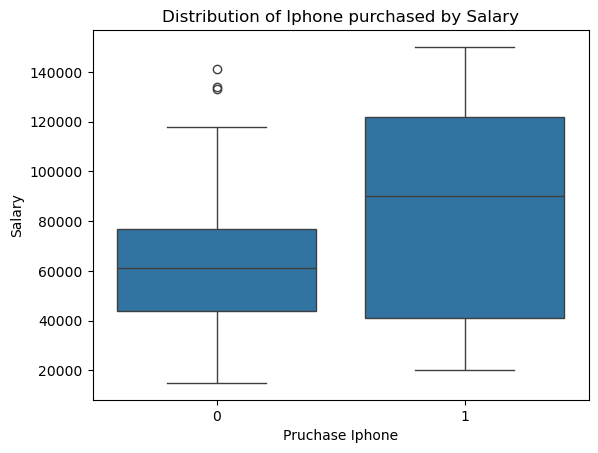

In [10]:
path = 'E:/Decision_Tree_Project8'
file_path = os.path.join(path, 'Box_plot_salary.png')
sns.boxplot(x = 'Purchase Iphone', y = 'Salary', data = data1)
plt.xlabel('Pruchase Iphone')
plt.ylabel('Salary')
plt.title('Distribution of Iphone purchased by Salary')
plt.savefig(file_path)
plt.show()

In [11]:
Q1 = data1[(data1['Purchase Iphone'] == 0)]['Salary'].quantile(0.25)
print(f'The Q1 value is {Q1}')
Q3 = data1[(data1['Purchase Iphone'] == 0)]['Salary'].quantile(0.75)
print(f'The Q3 value is {Q3}')
IQR = Q3 - Q1
print(f'The IQR value is {IQR}')
upper = Q3 + 1.5 * IQR
print(f'The Upper threshold value is {upper}')
lower = Q1 - 1.5 * IQR
print(f'The Lower threshold value is {lower}')

outliers = data1[(data1['Purchase Iphone']==0)& (data1['Salary']> upper)]
print(outliers)
data1.loc[outliers.index, 'Purchase Iphone'] = 1

The Q1 value is 44000.0
The Q3 value is 77000.0
The IQR value is 33000.0
The Upper threshold value is 126500.0
The Lower threshold value is -5500.0
     Gender  Age  Salary  Purchase Iphone
270       0   43  133000                0
284       1   48  141000                0
306       0   51  134000                0


# Model Planning

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [31]:
X = data1.drop('Purchase Iphone', axis=1)
y = data1['Purchase Iphone']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=387)

In [33]:
model = DecisionTreeClassifier(max_depth=5)
train_model = model.fit(X_train, y_train)
pred = train_model.predict(X_test)
pred

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1], dtype=int64)

In [34]:
acc = accuracy_score(y_test, pred)
print(f'The accuracy of the model is {acc*100}%')

The accuracy of the model is 98.75%


In [35]:
# got the accuracy of 98.75%

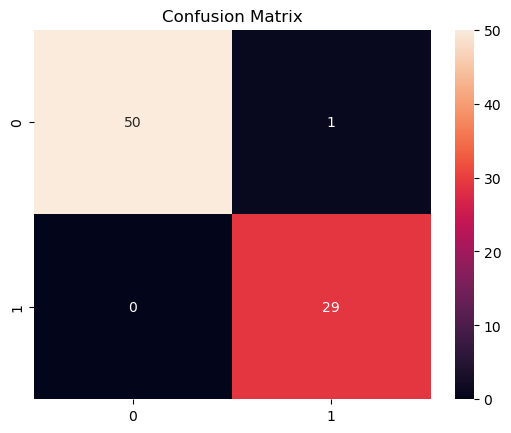

In [35]:
path = 'E:/Decision_Tree_Project8'
file_path = os.path.join(path, 'Confusion_Matrix.png')
sns.heatmap(confusion_matrix(pred, y_test), annot=True)
plt.title('Confusion Matrix')
plt.savefig(file_path)
plt.show()

In [39]:
# Out of 80 it predicted 79 correctly with the accuracy score of 98.75%

In [18]:
num_splits = 1000
accracy = []
for i in range(num_splits):
    random_state_value = i  
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=random_state_value)
    model = DecisionTreeClassifier(max_depth=5)
    train_model = model.fit(X_train, y_train)
    pred = train_model.predict(X_test)
    acc = round(accuracy_score(y_test, pred),4)
    accracy.append(acc)
print(accracy)

[0.9, 0.95, 0.9625, 0.9375, 0.9, 0.8875, 0.9375, 0.8, 0.925, 0.9, 0.8875, 0.9125, 0.8375, 0.875, 0.9125, 0.9375, 0.95, 0.875, 0.9125, 0.95, 0.875, 0.9625, 0.95, 0.925, 0.925, 0.9125, 0.9, 0.8625, 0.9, 0.9125, 0.875, 0.8875, 0.8875, 0.9125, 0.925, 0.875, 0.9375, 0.8875, 0.8625, 0.975, 0.85, 0.8625, 0.9375, 0.9625, 0.875, 0.9375, 0.8875, 0.875, 0.85, 0.9125, 0.9125, 0.8375, 0.9125, 0.925, 0.8875, 0.9375, 0.975, 0.925, 0.9125, 0.95, 0.875, 0.9375, 0.925, 0.8875, 0.8625, 0.925, 0.9125, 0.875, 0.9125, 0.8875, 0.9375, 0.9, 0.8875, 0.85, 0.9125, 0.875, 0.9125, 0.8875, 0.8, 0.8625, 0.875, 0.9, 0.9125, 0.9125, 0.975, 0.8875, 0.875, 0.9375, 0.925, 0.875, 0.9, 0.925, 0.925, 0.9125, 0.85, 0.9125, 0.925, 0.8875, 0.9125, 0.85, 0.85, 0.85, 0.925, 0.925, 0.9, 0.8875, 0.95, 0.875, 0.9625, 0.9125, 0.9125, 0.8875, 0.8625, 0.9125, 0.9375, 0.9, 0.9375, 0.85, 0.9, 0.9375, 0.875, 0.875, 0.925, 0.9, 0.875, 0.875, 0.925, 0.9375, 0.8625, 0.925, 0.925, 0.875, 0.8875, 0.9, 0.9125, 0.8875, 0.9375, 0.8875, 0.9375, 

In [19]:
values = pd.Series(accracy)
max_index = values.idxmax()
print(f"The index of the maximum value is: {max_index}")

The index of the maximum value is: 387
